# Deep Learning Framework

Deep Learning is a field within Machine Learning that deals with building and using Neural Network Models.

Neural Networks mimic the functioning of a human brain.

Neural Networks with more than three layers are typically categorised as Deep Learning Networks.

Perceptron

The perceptron is the unit for learning in an artificial neural network, A perceptron resembles a human brain cell.

A perceprton is a single cell or node in a neural network.

In Deep Learning we replace slope of model with weights called as w and intercept with the bias called as b.

Weights and Biases become the parameters for a neural network.

The number of weights equals the number of inputs/features.

# Artifical Neural Network

An ANN is a network of perceptrons. A deep neural network usually has three or more layers.

Each node has its own weights, biases and activation function. Each node is connected to al the nodes in the next layer forming a dense network.

Training an ANN means determining the right values for these parameters and hyperparameters such that it maximizes the accuracy of predictions for the given use case.

# Neural Network Architecture

Input Layer

The input to Deep Learning model is usually a vector of Numeric values.

Vectors are usually defined using NumPy arrays. It represents the feature variables or independent variables that are used for prediction as well as training.

Hidden Layer

An ANN can have one or more hidden layers. The more the layers are the deep the network is.

Each hidden layer can have one or more nodes. Typically, the node count is configured in range of 2^n. Examples are 8,16,32,64,128 etc.

A neural network is defined by the number of layers and nodes.

The output of each node in previous layer will become the inout for every node in the current layers.

When there are more nodes and layers it usually results in better accuracy. As a general practice, start with small number and keep adding until an acceptable accuracy levels are obtained.

Weights and Biases

They form the basis for Deep Leaarning Algorithms. Weights and Biases are trainable parameters in a neural network model.

Each input for each node will have an associated weight with it.

Activation Functions

An activation function plays an important role in creating the output of the node in the neural network.

An activation function takes the matrix output of the node and determines if and how the node will propagate information to the next layer.

The main objective of activation function is that it converts the output to a non-linear value. They serve as a critical step in helping a neural network learn specific patterns in the data.

TanH- A TanH function normalizes the output in the range of (-1 to +1)

ReLu- Rectified Linear Unit- A ReLu produces a zero if the output is negative. Else, it will produce the same input verbatim.

Softmax Function- This is used in the case of classification problems. It produces a vector of probabilities for each of the possible classes in the outcomes. The class with the highest probability will be considered as the final class.

These all activation functions are added as hyperparameters in the model.

Ouput Layer

The output layer is the final layer in the neural network where desired predictions are obtained.

Training a Neural Network Model

Set up and initialisation- Converting data into numeric vectors. Splitting data into training, validation and test sets.

Forward Propagation- Movement from input to hidden layer and then output layer

Measure Accuracy and Error

Backpropagation- If error is high then it adjusts weights and biases by the process of gradient descent to improve accuracy.

Gradient Descent is the process of repeating the forward and backward ropagation in order to reduce error and move closer to the desired model.

Batches and Epochs- 10000/10 (1000)

Validation and Testing

# Deep Learning Example- Iris Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

Prepare input data for deep learning

Load data into pandas dataframe

Convert the dataframe into anumy array

Scale the feature dataset

Use of onehot encoding for the target variable

Split the dataset into training and test datasets.

Load Data and Review content

In [ ]:
iris_data=pd.read_csv("iris.csv")
print(iris_data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Use label encoder to convert String to Numeric values for the target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

iris_data['Species']=label_encoder.fit_transform(iris_data['Species'])

print(iris_data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


Converting input to numpy array

In [ ]:
np_iris=iris_data.to_numpy()

print(np_iris.shape)

(150, 5)


Separate features and target variables

In [ ]:
X_data=np_iris[:,0:4]

Y_data=np_iris[:,4]

print("\n Features before Scaling : \n------------------------")

print(X_data[:5,:])

print("\ntarget before one-hot encoding: \n-------------------")

print(Y_data[:5])


 Features before Scaling : 
------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

target before one-hot encoding: 
-------------------
[0. 0. 0. 0. 0.]


Create a standard scaler object that if fit on the input data

In [ ]:
scaler=StandardScaler().fit(X_data)

# scale the numeric feature variable
X_data=scaler.transform(X_data)

# convert target variable as a one-hot encoded array
Y_data=tf.keras.utils.to_categorical(Y_data,3)

print("\n Features after Scaling : \n------------------------")

print(X_data[:5,:])

print("\ntarget after one-hot encoding: \n-------------------")

print(Y_data[:5])


 Features after Scaling : 
------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

target after one-hot encoding: 
-------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Splitting data into training and test sets

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X_data, Y_data, test_size=0.10)

print("\n Train test Dimensions: \n--------------")

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


 Train test Dimensions: 
--------------
(135, 4) (15, 4) (135, 3) (15, 3)


Create a Model

Number of hidden layers

Number of nodes in each layer

Activation functions

Loss function and accuracy measurements.

In [ ]:
from tensorflow import keras

# Number of classes in the target variable
NB_CLASSES=3

# Create a sequential model in keras
model=tf.keras.models.Sequential()

# add the first hidden layer
model.add(keras.layers.Dense(128, # Number of nodes
                            input_shape=(4,), # number of input variables
                            name="Hidden-Layer-1", # Logical name
                            activation="relu")) # activation function

# add a second hidden layer
model.add(keras.layers.Dense(128,
                            name="Hidden-Layer-2",
                            activation="relu"))

# add an output layer with softmax function
model.add(keras.layers.Dense(NB_CLASSES,
                            name="Output-Layer",
                            activation="softmax"))

# compile the model with loss and metrics
model.compile(loss="categorical_crossentropy",
             metrics=["accuracy"])

# print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training and Evaluating the model

In [ ]:
# Make it verbose so we can see the process
VERBOSE=1

# Set hyperparameters for training

# Set batch size
BATCH_SIZE=16

# Set the number of epochs
EPOCHS=20

# Set the validation split. 20% of the training dataset will be used for validation
VALIDATION_SPLIT=0.2

print("\nTraining Progress: \n------------------")

# Fitting the model. This will perform the enitre training cycle, including forward propagation, loss computation,
# backward propagation and gradient descent.

history=model.fit(X_train,
                  Y_train,
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  verbose=VERBOSE,
                  validation_split=VALIDATION_SPLIT)




Training Progress: 
------------------
Epoch 1/20
7/7 [==============================] - 1s 33ms/step - loss: 0.9247 - accuracy: 0.5556 - val_loss: 0.6670 - val_accuracy: 0.8519
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6171 - accuracy: 0.8148 - val_loss: 0.5017 - val_accuracy: 0.8148
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.4937 - accuracy: 0.8148 - val_loss: 0.4135 - val_accuracy: 0.8519
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 0.4252 - accuracy: 0.8241 - val_loss: 0.3537 - val_accuracy: 0.8889
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 0.3793 - accuracy: 0.8333 - val_loss: 0.3191 - val_accuracy: 0.8889
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 0.3398 - accuracy: 0.8333 - val_loss: 0.2841 - val_accuracy: 0.8889
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 0.3118 - accuracy: 0.8704 - val_loss: 0.2581 - val_accuracy: 


Accuracy During Training: 
-------------------------


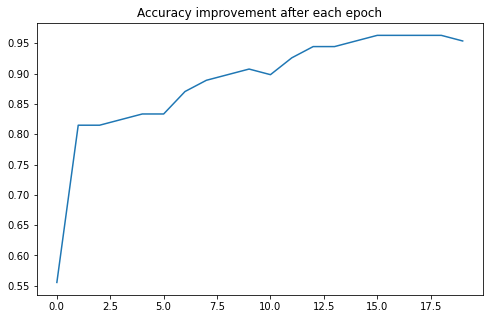

In [ ]:
print("\nAccuracy During Training: \n-------------------------")

import matplotlib.pyplot as plt

# Plot the accuracy of the model after each epoch

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvement after each epoch")
plt.show()

Evaluate the model against the test dataset and print the result

In [ ]:
print("\nEvaluate against test dataset: \n--------------------------")

model.evaluate(X_test, Y_test)


Evaluate against test dataset: 
--------------------------
1/1 [==============================] - 0s 36ms/step - loss: 0.1337 - accuracy: 1.0000


[0.133657768368721, 1.0]

In [ ]:
# Saving a model
model.save("iris_save")

#load the model
loaded_model=keras.models.load_model("iris_save")

#print the model summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Predictions with Deep Learning Model

In [ ]:
# raw prediction data
prediction_input=[[2.6,12.,2.4,4.4]]

# scale the prediction data with the same scaling object
scaled_input=scaler.transform(prediction_input)

# get the raw prediction probabilities
raw_prediction=loaded_model.predict(scaled_input)
print("Raw Prediction Output (Probabilities):",raw_prediction)

#Find Prediction
prediction=np.argmax(raw_prediction)
print("Prediction is",label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 222ms/step
Raw Prediction Output (Probabilities): [[9.9997640e-01 2.3651950e-05 1.0189199e-18]]
Prediction is ['setosa']


# Convolutional Neural Network

A Convolutional Neural Network (CNN) is a type of artificial neural network that is used in image recognition and processing that is specifically designed to process pixel data.

In [ ]:
# https://www.bing.com/images/search?view=detailV2&ccid=%2bxPK2X22&id=7F6EE107A48092A457BFD5436353A81DE81EE3E3&thid=OIP.-xPK2X22QAU7ssU8ErD0pwHaD9&mediaurl=https%3a%2f%2fcdn-images-1.medium.com%2fmax%2f1600%2f1*uAeANQIOQPqWZnnuH-VEyw.jpeg&exph=856&expw=1600&q=cnn+neural+network&simid=607988187849189153&FORM=IRPRST&ck=9B20908F0103F6CA825F53F009F50FF7&selectedIndex=0&ajaxhist=0&ajaxserp=0

# CNN Model on MNIST Dataset for written digit classification

MNIST Dataset is the handwritten numbers taken as images. All images are grey scale.

In [ ]:
from keras.datasets import mnist
#from keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

Load the data

In [ ]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Understand the image format

In [ ]:
X_train[0].shape

(28, 28)

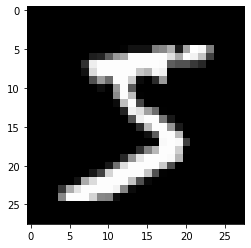

In [ ]:
plt.imshow(X_train[0],cmap="gray")

In [ ]:
y_train[0]

5

Preprocess the image data

In [ ]:
image_height, image_width=28,28

In [ ]:
X_train=X_train.reshape(60000, image_height*image_width)
X_test=X_test.reshape(10000, image_height*image_width)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
X_train/=255.0
X_test/=255.0

In [ ]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


Converting the target value into 10 bins. So, we will see that the output from a model will then go into one of these bins.

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Building the model

In [ ]:
model=Sequential()

model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation="softmax"))

Compile the model

In [ ]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history= model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 23s 11ms/step - loss: 0.1868 - accuracy: 0.9424 - val_loss: 0.0974 - val_accuracy: 0.9679
Epoch 2/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0788 - accuracy: 0.9752 - val_loss: 0.0867 - val_accuracy: 0.9725
Epoch 3/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0555 - accuracy: 0.9822 - val_loss: 0.0796 - val_accuracy: 0.9778
Epoch 4/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.0761 - val_accuracy: 0.9787
Epoch 5/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0869 - val_accuracy: 0.9760
Epoch 6/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.1005 - val_accuracy: 0.9770
Epoch 7/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0880 -

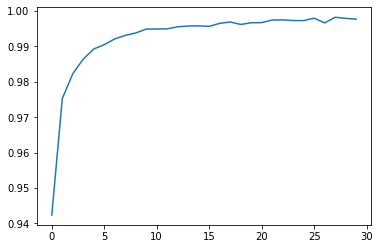

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
score= model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1779 - accuracy: 0.9814


In neural networks we only have fully connected layer, otherwise known as dense layer. With Convolutional neural networks, we have more operations such as the convolution operation, max pooling, flattening and also a fully connected layer.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
X_train/=255.0
X_test/=255.0

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


CNN Model Development

In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [ ]:
history_cnn=cnn.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_train, y_train))

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1476 - accuracy: 0.9540 - val_loss: 0.0611 - val_accuracy: 0.9808
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.0294 - val_accuracy: 0.9906
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0220 - val_accuracy: 0.9930
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0227 - val_accuracy: 0.9929
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0190 - accuracy: 0.9935 - val_loss: 0.0137 - val_accuracy: 0.9958
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0120 - val_accuracy: 0.9961
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0108 - 

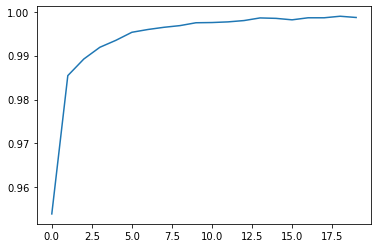

In [ ]:
plt.plot(history_cnn.history['accuracy'])

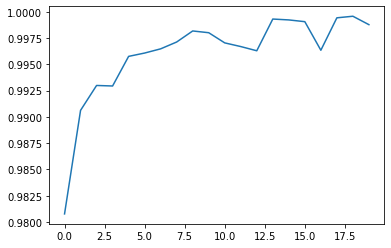

In [ ]:
plt.plot(history_cnn.history['val_accuracy'])